In [1]:
# imports
import numpy as np
np.random.seed(42)
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub

In [2]:
# downloading the data
data_dir = tf.keras.utils.get_file(
    fname='flower_photos',
    origin="http://download.tensorflow.org/example_images/flower_photos.tgz",
    untar=True)

In [3]:
# preparing the data
train_ds, val_ds = image_dataset_from_directory(
    directory=data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    subset='both',
    validation_split=.25,
    seed=18)

Found 3670 files belonging to 5 classes.
Using 2753 files for training.
Using 917 files for validation.


In [4]:
# printing class names in dataset
print(train_ds.class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [5]:
# defining model architecture
model = Sequential([
    Rescaling(scale= 1.0 / 224.0, input_shape=(224, 224, 3)),
    hub.KerasLayer(handle='https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4', trainable=False, name='Inception'),
    Dense(40, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(rate=.5),
    Dense(20, activation='relu', kernel_initializer='he_uniform'),
    Dense(5, activation='softmax')
])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [6]:
# getting a model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 Inception (KerasLayer)      (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 40)                81960     
                                                                 
 batch_normalization (BatchN  (None, 40)               160       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                        

In [7]:
# model compilation
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# model training
history = model.fit(train_ds, epochs=5, batch_size=32, validation_data=val_ds, verbose=1)

Epoch 1/5
87/87 [==============================] - 28s 137ms/step - loss: 1.0789 - accuracy: 0.5950 - val_loss: 0.6303 - val_accuracy: 0.7808
Epoch 2/5
87/87 [==============================] - 12s 135ms/step - loss: 0.6310 - accuracy: 0.7904 - val_loss: 0.4532 - val_accuracy: 0.8451
Epoch 3/5
87/87 [==============================] - 10s 100ms/step - loss: 0.4966 - accuracy: 0.8304 - val_loss: 0.4006 - val_accuracy: 0.8561
Epoch 4/5
87/87 [==============================] - 10s 110ms/step - loss: 0.4329 - accuracy: 0.8463 - val_loss: 0.3633 - val_accuracy: 0.8691
Epoch 5/5
87/87 [==============================] - 10s 109ms/step - loss: 0.3917 - accuracy: 0.8663 - val_loss: 0.3404 - val_accuracy: 0.8746


In [9]:
# model evaluation
score = model.evaluate(val_ds, verbose=0)
print('Accuracy:', round(score[1] * 100, 2))

Accuracy: 87.46


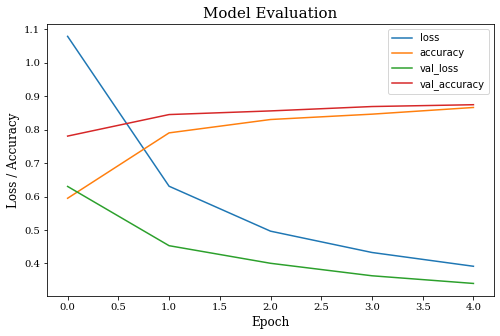

In [10]:
# model evaluation
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel('Epoch', family='serif', size=12)
plt.ylabel('Loss / Accuracy', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Model Evaluation', family='serif', size=15);